# Applying Classification Modeling
The goal of this week's assessment is to **find the model which best predicts whether or not a person will default on their bank loan**. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model 
evaluation. 
 Data Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. **From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.** Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. 

With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(print_changed_only=False)


# import sklearn model.s

## 1. Data Cleaning

In [63]:
df = pd.read_csv('training_data.csv' , index_col=0) #header= 18382

In [64]:
pd.set_option('display.max_columns', None)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [65]:
df.drop(['ID'], inplace = True) # Extra label headers

In [66]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column])


In [67]:
df.drop(labels='2198', inplace=True) # outlier in X1  >800000
df["X3"].replace([0, 5, 6], 4, inplace = True) # 0,5,6 not described in data description
df.drop(labels = ['23092'], inplace = True) # X1 Outlier in category 4 of X3
df["X4"].replace(0, 3, inplace = True) # 0 not describe in data description
df['X6'].replace([-2,-1], 0, inplace = True)
df['X7'].replace([-2,-1], 0, inplace = True)
df['X8'].replace([-2,-1], 0, inplace = True)
df['X9'].replace([-2,-1], 0, inplace = True)
df['X10'].replace([-2,-1], 0, inplace = True)
df['X11'].replace([-2,-1], 0, inplace = True)
df.drop(labels= ['25732', '5297'], inplace = True) # X14 Outlier >800000
df.drop(labels= ['20893'] ,inplace = True) #X16 Outlier >800000
df.drop(labels= ['291','26098'], inplace = True) # X17 Outlier < -200000
df.drop(labels=['28717','12331'], inplace = True) # X18 outlier >500000
df.drop(labels=['28004','14514'], inplace = True) #X19 > 500000
df.drop(labels=['27441'], inplace = True) #X20  outlier > 500000
df.drop(labels=['24687'], inplace = True) # X21 outlier > 500000
df.drop(labels=['14512','507'], inplace = True) # X23 outlier >500000

In [68]:
orig_feats =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']

In [69]:
data1 = df[orig_feats]

## 2. EDA === see [here](http://localhost:8888/notebooks/Pre%20EDA.ipynb)

## 3. Feature Engineering

In [70]:
df['avg_pay_status'] = round(((df['X6'] + df['X7']+df['X8']+df['X9']+df['X10']+df['X11'])/6),2)

In [71]:
print(df['avg_pay_status'].corr(df['X6'])) 
print(df['avg_pay_status'].corr(df['Y']))

0.7376323183515687
0.3757530027923717


In [72]:
pay_status_X = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
# df.drop(labels = pay_status_X, axis = 1)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'Y~X6+X7+X8+X9+X10+X11'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     774.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:55:57   Log-Likelihood:                -10104.
No. Observations:               22484   AIC:                         2.022e+04
Df Residuals:                   22477   BIC:                         2.028e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1367      0.003     48.178      0.000       0.131       0.142
X6             0.1625      0.005     34.309      0.000       0.153       0.172
X7             0.0174      0.005      3.440      0.001       0.008       0.027
X8             0.0293      0.005      5.791      0.000       0.019       0.039
X9             0.0065      0.006      1.133      0.257      -0.005       0.018
X10            0.0192      0.006      3.039      0.002       0.007       0.032
X11            0.0353      0.005      6.632      0.000       0.025       0.046
==============================================================================
Omnibus:                     3620.567   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5639.165
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                       3.812   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
f = 'Y~avg_pay_status'
model2 = ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     3696.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:55:59   Log-Likelihood:                -10505.
No. Observations:               22484   AIC:                         2.101e+04
Df Residuals:                   22482   BIC:                         2.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1504      0.003     52.930      0.000       0.145       0.156
avg_pay_status     0.2574      0.004     60.796      0.000       0.249       0.266
==============================================================================
Omnibus:                     3613.520   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5610.038
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       3.511   Cond. No.                         1.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Include either the avg or all the other vars in the model not both**

In [73]:
df['avg_billamt'] = (df['X12'] + df['X13'] + df['X14'] + df['X15'] + df['X16'] + df['X17'])/6

In [14]:
f = 'Y~X12+X13+X14+X15+X16+X17'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.491
Date:                Sun, 08 Nov 2020   Prob (F-statistic):             0.0207
Time:                        19:56:04   Log-Likelihood:                -12209.
No. Observations:               22484   AIC:                         2.443e+04
Df Residuals:                   22477   BIC:                         2.449e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2273      0.003     66.541      0.000       0.221       0.234
X12        -3.946e-07   1.28e-07     -3.080      0.002   -6.46e-07   -1.43e-07
X13         2.896e-07   1.64e-07      1.768      0.077   -3.15e-08    6.11e-07
X14        -5.016e-08   1.55e-07     -0.324      0.746   -3.54e-07    2.54e-07
X15        -6.968e-08   1.65e-07     -0.423      0.672   -3.93e-07    2.53e-07
X16         5.186e-08   1.86e-07      0.279      0.780   -3.12e-07    4.16e-07
X17         1.428e-07   1.46e-07      0.976      0.329   -1.44e-07     4.3e-07
==============================================================================
Omnibus:                     4048.081   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6638.820
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       2.761   Cond. No.                     2.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
f = 'Y~avg_billamt'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.635
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.105
Time:                        19:57:11   Log-Likelihood:                -12215.
No. Observations:               22484   AIC:                         2.443e+04
Df Residuals:                   22482   BIC:                         2.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2267      0.003     66.515      0.000       0.220       0.233
avg_billamt -7.134e-08    4.4e-08     -1.623      0.105   -1.57e-07    1.48e-08
==============================================================================
Omnibus:                     4053.112   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6651.727
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       2.762   Cond. No.                     9.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
print(df['avg_billamt'].corr(df['Y']))
print(df['avg_billamt'].describe())

-0.010824748891872444
count     22484.000000
mean      44936.195954
std       63213.254434
min      -43253.833333
25%        4723.791667
50%       20877.333333
75%       57022.750000
max      577585.000000
Name: avg_billamt, dtype: float64


In [17]:
df[df['avg_billamt'] <=0]['avg_billamt']

18894    0.0
28407    0.0
17391    0.0
25400    0.0
8109     0.0
        ... 
9818     0.0
25532    0.0
19       0.0
19210    0.0
17431    0.0
Name: avg_billamt, Length: 808, dtype: float64

In [18]:
# df.loc[(df['avg_billamt'] > 57000)]['avg_billamt'].count()
df.shape

(22484, 26)

In [74]:
# binning the average bill amount to 4 groups in a new variable of df['billamt_status'].
conditions = [
    df['avg_billamt'] <= 0,
    (df['avg_billamt'] > 0) & (df['avg_billamt'] <= 5000),
     (df['avg_billamt'] > 5000) & (df['avg_billamt'] <= 21000),
     (df['avg_billamt'] > 21000) & (df['avg_billamt'] <= 57000),
     df['avg_billamt'] > 57000
     ]

choices = [
    0,
    1,
    2,
    3,
    4
]
df['billamt_status'] = np.select(conditions, choices)


In [20]:
df['billamt_status'].value_counts()

4    5623
3    5593
2    5530
1    4930
0     808
Name: billamt_status, dtype: int64

In [21]:
df['billamt_status'].corr(df['Y'])
# has a better corr value than the avg bill amount var, with the target.

-0.024686904353862216

In [22]:
df['billamt_status'].corr(df['avg_billamt'])

0.7091817791755448

In [75]:
f = 'Y~billamt_status'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.71
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           0.000214
Time:                        20:29:36   Log-Likelihood:                -12210.
No. Observations:               22484   AIC:                         2.442e+04
Df Residuals:                   22482   BIC:                         2.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2449      0.006     38.269      0.000       0.232       0.257
billamt_status    -0.0087      0.002     -3.703      0.000      -0.013      -0.004
==============================================================================
Omnibus:                     4049.035   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6642.093
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       2.762   Cond. No.                         6.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


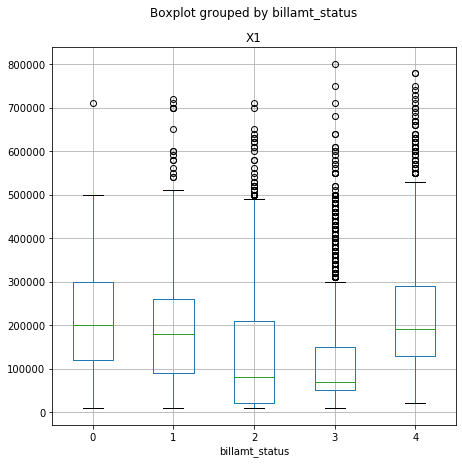

In [23]:
df.boxplot('X1', by= 'billamt_status', figsize = (7,7))

On average the highest credit statement bill amount has the  highest credit limit balances. However, as the credit statement bill amount 
O value has a greater than 700000

In [24]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y', 'avg_pay_status', 'avg_billamt', 'billamt_status'],
      dtype='object')

In [76]:
df['bal_change'] = (df['X12']- df['X17'])

In [77]:
f = 'Y~bal_change'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.10
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           0.000864
Time:                        20:30:15   Log-Likelihood:                -12211.
No. Observations:               22484   AIC:                         2.443e+04
Df Residuals:                   22482   BIC:                         2.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2262      0.003     78.290      0.000       0.221       0.232
bal_change -2.112e-07   6.34e-08     -3.332      0.001   -3.35e-07   -8.69e-08
==============================================================================
Omnibus:                     4049.802   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6643.526
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       2.761   Cond. No.                     4.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df['bal_change'].describe()

count     22484.000000
mean      12523.041096
std       43834.849193
min     -394967.000000
25%       -2874.000000
50%         945.000000
75%       19710.750000
max      708323.000000
Name: bal_change, dtype: float64

In [27]:
df.loc[(df['bal_change'] <= 0),'bal_change'] = 0

In [28]:
df['bal_change'].corr(df['Y'])

-0.04300797324970015

In [29]:
billamt_X = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']

df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y', 'avg_pay_status', 'avg_billamt', 'billamt_status',
       'bal_change'],
      dtype='object')

In [30]:
df.drop(columns = billamt_X, axis = 1, inplace= True )

In [31]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y', 'avg_pay_status',
       'avg_billamt', 'billamt_status', 'bal_change'],
      dtype='object')

In [32]:
dummy1 = pd.get_dummies(df['X2'],drop_first= True) # dummy for sex 1 is male and 2 is female
dummy2 = pd.get_dummies(df['X3'], drop_first = True) #dummy for education 1 for grad school, 2 for University, 3 for High School and 4 for others
dummy3 = pd.get_dummies(df['X4'], drop_first=True ) #dummy for marriage 1 = married; 2 = single; 3 = others
dummy4 = pd.get_dummies(df['billamt_status'], drop_first = True) #for avg bill amount of vars from X12 to X17

In [33]:
dummy_feats = ['X2', 'X3', 'X4', 'avg_billamt', 'billamt_status'] #avg_billamt used to build billamt status
df.drop(columns = dummy_feats, axis = 1, inplace= True )
df.drop(columns = 'avg_pay_status', axis=1, inplace=True)

In [34]:
df.columns

Index(['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y', 'bal_change'],
      dtype='object')

In [35]:
print(df.shape)
print(dummy1.shape)
print(dummy2.shape)
print(dummy3.shape)
print(dummy4.shape)
dummy4.columns

(22484, 16)
(22484, 1)
(22484, 3)
(22484, 2)
(22484, 4)


Int64Index([1, 2, 3, 4], dtype='int64')

### polynomial features

In [36]:
data1 = df[['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]
data1.index

Index(['28835', '25329', '18894', '690', '6239', '14912', '9405', '12899',
       '6495', '11632',
       ...
       '6229', '11463', '2715', '18588', '6528', '16247', '2693', '8076',
       '20213', '7624'],
      dtype='object', length=22484)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#Instantiating polynomial features object
poly = PolynomialFeatures(degree=2, include_bias=False)

# applying polynomial feature object to data
poly_data = poly.fit_transform(data1)

#assigning feature names from main dataframe
poly_columns = poly.get_feature_names(data1.columns)

#converting array to dataframe
df_poly = pd.DataFrame(poly_data, columns = poly_columns, index=data1.index)

In [39]:
df_poly.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X18,X19,X20,X21,X22,X23,X1^2,X1 X5,X1 X6,X1 X7,X1 X8,X1 X9,X1 X10,X1 X11,X1 X18,X1 X19,X1 X20,X1 X21,X1 X22,X1 X23,X5^2,X5 X6,X5 X7,X5 X8,X5 X9,X5 X10,X5 X11,X5 X18,X5 X19,X5 X20,X5 X21,X5 X22,X5 X23,X6^2,X6 X7,X6 X8,X6 X9,X6 X10,X6 X11,X6 X18,X6 X19,X6 X20,X6 X21,X6 X22,X6 X23,X7^2,X7 X8,X7 X9,X7 X10,X7 X11,X7 X18,X7 X19,X7 X20,X7 X21,X7 X22,X7 X23,X8^2,X8 X9,X8 X10,X8 X11,X8 X18,X8 X19,X8 X20,X8 X21,X8 X22,X8 X23,X9^2,X9 X10,X9 X11,X9 X18,X9 X19,X9 X20,X9 X21,X9 X22,X9 X23,X10^2,X10 X11,X10 X18,X10 X19,X10 X20,X10 X21,X10 X22,X10 X23,X11^2,X11 X18,X11 X19,X11 X20,X11 X21,X11 X22,X11 X23,X18^2,X18 X19,X18 X20,X18 X21,X18 X22,X18 X23,X19^2,X19 X20,X19 X21,X19 X22,X19 X23,X20^2,X20 X21,X20 X22,X20 X23,X21^2,X21 X22,X21 X23,X22^2,X22 X23,X23^2
28835,220000.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,4.840000e+10,7920000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000e+09,1.763960e+09,2.226620e+09,1.321320e+09,2.417140e+09,3.163138e+10,1296.0,0.0,0.0,0.0,0.0,0.0,0.0,360000.0,288648.0,364356.0,216216.0,395532.0,5176044.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000000.0,80180000.0,101210000.0,60060000.0,109870000.0,1.437790e+09,64288324.0,81150178.0,48156108.0,88093766.0,1.152820e+09,102434641.0,60786726.0,111199427.0,1.455187e+09,36072036.0,65987922.0,863536674.0,120714169.0,1.579700e+09,2.067240e+10
25329,200000.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,326.0,326.0,326.0,326.0,326.0,326.0,4.000000e+10,5800000.0,0.0,0.0,0.0,0.0,0.0,0.0,6.520000e+07,6.520000e+07,6.520000e+07,6.520000e+07,6.520000e+07,6.520000e+07,841.0,0.0,0.0,0.0,0.0,0.0,0.0,9454.0,9454.0,9454.0,9454.0,9454.0,9454.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106276.0,106276.0,106276.0,106276.0,106276.0,1.062760e+05,106276.0,106276.0,106276.0,106276.0,1.062760e+05,106276.0,106276.0,106276.0,1.062760e+05,106276.0,106276.0,106276.0,106276.0,1.062760e+05,1.062760e+05
18894,180000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.240000e+10,4860000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
690,80000.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,6.400000e+09,2560000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.482400e+08,1.360000e+08,1.217600e+08,1.238400e+08,1.190400e+08,1.200000e+08,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,59296.0,54400.0,48704.0,49536.0,47616.0,48000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3433609.0,3150100.0,2820266.0,2868444.0,2757264.0,2.779500e+06,2890000.0,2587400.0,2631600.0,2529600.0,2.550000e+06,2316484.0,2356056.0,2264736.0,2.283000e+06,2396304.0,2303424.0,2322000.0,2214144.0,2.232000e+06,2.250000e+06
6239,10000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.000000e+08,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+07,1.100000e+07,6.000000e+06,3.000000e+06,3.000000e+06,1.000000e+07,729.0,0.0,0.0,0.0,0.0,0.0,0.0,54000.0,29700.0,16200.0,8100.0,8100.0,27000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [40]:
df_poly.drop(columns =['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'], axis=1, inplace = True)

In [41]:
poly_features = list(df_poly.columns)
df.columns

Index(['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y', 'bal_change'],
      dtype='object')

In [42]:
print(df.shape) #has Y
print(dummy1.shape) # no Y
print(dummy2.shape) # no Y
print(dummy3.shape) # no Y
print(dummy4.shape) # no Y
print(df_poly.shape) # no Y

(22484, 16)
(22484, 1)
(22484, 3)
(22484, 2)
(22484, 4)
(22484, 105)


In [43]:
df1 = pd.concat([df, df_poly, dummy1, dummy2, dummy3, dummy4 ], axis = 1)
df1.shape

(22484, 131)

In [44]:
# Split data to be used in the models
# Create matrix of features
X = df1.drop('Y', axis = 1) # grabs everything else but 'default column'


# Create target variable
y = df1['Y'] # y is the column we're trying to predict

In [43]:
y.head()

28835    1
25329    0
18894    0
690      0
6239     1
Name: Y, dtype: int64

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150, test_size=0.3)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)

Training set - Features:  (15738, 130) Target:  (15738,)
Test set - Features:  (6746, 130) Target:  (6746,)


In [47]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.775384
1    0.224616
Name: Y, dtype: float64
0    0.77898
1    0.22102
Name: Y, dtype: float64


## 4. Feature Selection

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

### Select K Best = 50

In [49]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=50) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
selected_columns

Index(['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X1^2', 'X1 X5', 'X1 X6',
       'X1 X7', 'X1 X8', 'X1 X9', 'X1 X10', 'X1 X11', 'X5 X6', 'X5 X7',
       'X5 X8', 'X5 X9', 'X5 X10', 'X5 X11', 'X6^2', 'X6 X7', 'X6 X8', 'X6 X9',
       'X6 X10', 'X6 X11', 'X6 X18', 'X6 X20', 'X6 X21', 'X7^2', 'X7 X8',
       'X7 X9', 'X7 X10', 'X7 X11', 'X7 X18', 'X7 X20', 'X8^2', 'X8 X9',
       'X8 X10', 'X8 X11', 'X8 X19', 'X9^2', 'X9 X10', 'X9 X11', 'X9 X20',
       'X10^2', 'X10 X11', 'X11^2', 'X11 X22'],
      dtype='object')

In [50]:
X_train_kb50 = X_train[selected_columns]
X_test_kb50 = X_test[selected_columns]

### Select K Best = 75

In [51]:
#setting parameters to choose the best 75 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=75) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train, y_train)

SelectKBest(k=75, score_func=<function f_classif at 0x7fa472f3d510>)

In [52]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
selected_columns

Index(['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20', 'X23',
       'X1^2', 'X1 X5', 'X1 X6', 'X1 X7', 'X1 X8', 'X1 X9', 'X1 X10', 'X1 X11',
       'X1 X18', 'X5 X6', 'X5 X7', 'X5 X8', 'X5 X9', 'X5 X10', 'X5 X11',
       'X5 X18', 'X5 X19', 'X6^2', 'X6 X7', 'X6 X8', 'X6 X9', 'X6 X10',
       'X6 X11', 'X6 X18', 'X6 X19', 'X6 X20', 'X6 X21', 'X6 X22', 'X7^2',
       'X7 X8', 'X7 X9', 'X7 X10', 'X7 X11', 'X7 X18', 'X7 X19', 'X7 X20',
       'X7 X21', 'X7 X22', 'X8^2', 'X8 X9', 'X8 X10', 'X8 X11', 'X8 X18',
       'X8 X19', 'X8 X20', 'X8 X21', 'X8 X22', 'X9^2', 'X9 X10', 'X9 X11',
       'X9 X18', 'X9 X20', 'X9 X21', 'X9 X22', 'X10^2', 'X10 X11', 'X10 X18',
       'X10 X20', 'X10 X21', 'X10 X22', 'X11^2', 'X11 X20', 'X11 X21',
       'X11 X22'],
      dtype='object')

In [53]:
X_train_kb75 = X_train[selected_columns]
X_test_kb75 = X_test[selected_columns]

### Select K Best = 100

In [54]:
#setting parameters to choose the best 100 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=100) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
selected_columns

X_train_kb100 = X_train[selected_columns]
X_test_kb100 = X_test[selected_columns]

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### KNN --- scaling with minmax

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

scaler = MinMaxScaler()  
scaler.fit(X_train)

X_train_scale1 = scaler.transform(X_train)  
X_test_scale1 = scaler.transform(X_test)

knn_all = KNeighborsClassifier(n_neighbors=1, n_jobs = -1)

knn_all.fit(X_train_scale1, y_train)

y_pred_scale1 =knn_all.predict(X_test_scale1)

print('f1score - all scaled:' + str(metrics.f1_score(y_test, y_pred_scale1)))


f1score - all scaled:0.3734068205304857


In [56]:
scaler = MinMaxScaler()  
scaler.fit(X_train_kb50)

X_train_scale2 = scaler.transform(X_train_kb50)  
X_test_scale2 = scaler.transform(X_test_kb50)

knn_kb50 = KNeighborsClassifier(n_neighbors=1)

knn_kb50.fit(X_train_scale2, y_train)

y_pred_scale2 =knn_kb50.predict(X_test_scale2)

print('f1score - Kb50 scaled:' + str(metrics.f1_score(y_test, y_pred_scale2)))

f1score - Kb50 scaled:0.38469422617014004


In [57]:
scaler = MinMaxScaler()  
scaler.fit(X_train_kb75)

X_train_scale3 = scaler.transform(X_train_kb75)  
X_test_scale3 = scaler.transform(X_test_kb75)

knn_kb75 = KNeighborsClassifier(n_neighbors=1)

knn_kb75.fit(X_train_scale3, y_train)

y_pred_scale3 =knn_kb75.predict(X_test_scale3)

print('f1score - kb75 scaled:' + str(metrics.f1_score(y_test, y_pred_scale3)))

f1score - kb75 scaled:0.40654664484451714


In [59]:
scaler = MinMaxScaler()  
scaler.fit(X_train_kb100)

X_train_scale4 = scaler.transform(X_train_kb100)  
X_test_scale4 = scaler.transform(X_test_kb100)

knn_kb100 = KNeighborsClassifier(n_neighbors=1)

knn_kb100.fit(X_train_scale4, y_train)

y_pred_scale4 =knn_kb100.predict(X_test_scale4)

print('f1score - kb100 scaled:' + str(metrics.f1_score(y_test, y_pred_scale4)))

f1score - kb100 scaled:0.40480961923847697


**Optimal K for KNN**

In [99]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [100]:
#create a container to track the scores
k_scores2=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn_kb50_k = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn_kb50_k.fit(X_train_scale2, y_train)
    y_pred_knn2 = knn_kb50_k.predict(X_test_scale2)
    
    acc2 = metrics.accuracy_score(y_test, y_pred_scale2)
    
    k_scores2.append(acc2)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores2)
    
print(idx+1, val)

1 0.7330269789504892


In [102]:
knn = KNeighborsClassifier(n_neighbors=1)

knn_kb50_k.fit(X_train_scale2, y_train)

y_pred_knn2 =knn_kb50_k.predict(X_test_scale2)

print('f1score with k=1:  ' + str(metrics.f1_score(y_test, y_pred_knn2)))

f1score with k=1:  0.4442462087421945


In [103]:
# need to scale the X_train all data


#create a container to track the scores
k_scores3=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn_kb75_k = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn_kb75_k.fit(X_train_scale3, y_train)
    y_pred_knn3 = knn_kb75_k.predict(X_test_scale3)
    
    acc3 = metrics.accuracy_score(y_test, y_pred_knn3)
    
    k_scores3.append(acc3)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores3)
    
print(idx+1, val)

17 0.8158908983101097


In [77]:
knn = KNeighborsClassifier(n_neighbors=17)

knn_kb75_k.fit(X_train_knn3, y_train)

y_pred_knn3 =knn_kb75_k.predict(X_test_knn3)

print('f1score with k=17:  ' + str(metrics.f1_score(y_test, y_pred_knn3)))

f1score with k=20:  0.4472049689440994


In [78]:
scaler = MinMaxScaler()  
scaler.fit(X_train)

X_train_knn4 = scaler.transform(X_train)  
X_test_knn4 = scaler.transform(X_test)

#create a container to track the scores
k_scores4=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn_kb100_k = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn_kb100_k.fit(X_train_scale4, y_train)
    y_pred_knn4 = knn_kb100_k.predict(X_test_scale4)
    
    acc4 = metrics.accuracy_score(y_test, y_pred_knn4)
    
    k_scores4.append(acc4)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores4)
    
print(idx+1, val)

17 0.8055143788911948


In [79]:
knn = KNeighborsClassifier(n_neighbors=17)

knn_kb100_k.fit(X_train_scale4, y_train)

y_pred_knn4 =knn_kb100_k.predict(X_test_scale4)

print('f1score with k=17:  ' + str(metrics.f1_score(y_test, y_pred_knn4)))

f1score with k=20:  0.3396603396603397


### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

logreg_all = LogisticRegression(random_state = 25, max_iter=1000, C =1e5)

logreg_all.fit(X_train_scale1, y_train) #fit logreg model on n_features = 50

# class predictions (not predicted probabilities)
y_pred_all = logreg_all.predict(X_test_scale1)

print(metrics.accuracy_score(y_test, y_pred_all))
print(metrics.f1_score(y_test, y_pred_all))
print(metrics.roc_auc_score(y_test, y_pred_all))

0.8147050103765194
0.46259673258813416
0.6521570271613826


In [91]:
logreg_kb75 = LogisticRegression(random_state = 25)

logreg_kb75.fit(X_train_kb75, y_train) #fit logreg model on n_features = 50

# class predictions (not predicted probabilities)
y_pred_kb75 = logreg_kb75.predict(X_test_kb75)

print(metrics.accuracy_score(y_test, y_pred_kb75))
print(metrics.f1_score(y_test, y_pred_kb75))
print(metrics.roc_auc_score(y_test, y_pred_kb75))

0.8013637711236288
0.3266331658291457
0.5924315955996046


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [104]:
## Scaled kb75
logreg_scaled = LogisticRegression(random_state = 25, max_iter= 10000)

logreg_scaled.fit(X_train_scale3, y_train) #fit logreg model on n_features = 50

# class predictions (not predicted probabilities)
y_pred_k50 = logreg_scaled.predict(X_test_scale3)

print(metrics.accuracy_score(y_test, y_pred_k50))
print(metrics.f1_score(y_test, y_pred_k50))
print(metrics.roc_auc_score(y_test, y_pred_k50))

0.8193003261191817
0.46511627906976744
0.6531850155803198


#### Weighted Logistic Regression

In [200]:
w = {0:20, 1:80}

logreg_w1 = LogisticRegression(random_state=25, class_weight=w, max_iter=10000, C=1e5)

logreg_w1.fit(X_train_scale3, y_train) #fit logreg model on n_features = 50

y_pred_w = logreg_w1.predict(X_test_scale3)

print(metrics.accuracy_score(y_test, y_pred_w))
print(metrics.f1_score(y_test, y_pred_w))
print(metrics.roc_auc_score(y_test, y_pred_w))

0.7539282537800178
0.5174418604651162
0.6976962313047329


In [199]:
w = {0:25, 1:75}

logreg_w2 = LogisticRegression(random_state=25, class_weight=w, max_iter=10000, C=1e5)

logreg_w2.fit(X_train_scale3, y_train) #fit logreg model on n_features = 50

y_pred_w = logreg_w2.predict(X_test_scale3)

print(metrics.accuracy_score(y_test, y_pred_w))
print(metrics.f1_score(y_test, y_pred_w))
print(metrics.roc_auc_score(y_test, y_pred_w))

0.768900088941595
0.515387006527821
0.692654053084763


In [201]:

logreg_all_w = LogisticRegression(random_state = 25, max_iter=1000, C =1e5, class_weight={0:20,1:80})

logreg_all_w.fit(X_train_scale1, y_train) #fit logreg model on n_features = 50

# class predictions (not predicted probabilities)
y_pred_all = logreg_all_w.predict(X_test_scale1)

print(metrics.accuracy_score(y_test, y_pred_all))
print(metrics.f1_score(y_test, y_pred_all))
print(metrics.roc_auc_score(y_test, y_pred_all))

0.7469611621701749
0.5198312236286919
0.7013910293349057


### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier 


In [109]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
clf1_all = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf1_all.fit(X_train,y_train)

#predict the training set
y_pred_train = clf1_all.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf1_all.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Testing roc_auc score:", metrics.roc_auc_score(y_test, y_pred_test))

Training F1 Score: 0.9987253930038239
Testing F1 Score: 0.38939197930142305
Testing roc_auc score: 0.606825603159075


In [111]:
clf2_scale1 = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf2_scale1.fit(X_train_scale1,y_train)

#predict the training set
y_pred_train = clf2_scale1.predict(X_train_scale1)

#Predict the response for test dataset
y_pred_test = clf2_scale1.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Testing roc_auc score:", metrics.roc_auc_score(y_test, y_pred_test))

Training F1 Score: 0.9987253930038239
Testing F1 Score: 0.38351719662556777
Testing roc_auc score: 0.6030416562170358


In [113]:
clf3_scale3 = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf3_scale3.fit(X_train_scale3,y_train)

#predict the training set
y_pred_train = clf3_scale3.predict(X_train_scale3)

#Predict the response for test dataset
y_pred_test = clf3_scale3.predict(X_test_scale3)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Testing roc_auc score:", metrics.roc_auc_score(y_test, y_pred_test))

Training F1 Score: 0.9923142613151152
Testing F1 Score: 0.38390501319261217
Testing roc_auc score: 0.603924594187389


In [150]:
w = {0:20, 1:80}
clf4_scale3 = DecisionTreeClassifier(class_weight=w, max_depth= 6, random_state = 100)

#Train Decision Tree Classifier
clf4_scale3.fit(X_train_scale3,y_train)

#predict the training set
y_pred_train = clf4_scale3.predict(X_train_scale3)

#Predict the response for test dataset
y_pred_test = clf4_scale3.predict(X_test_scale3)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Testing roc_auc score:", metrics.roc_auc_score(y_test, y_pred_test))

Training F1 Score: 0.52838519764508
Testing F1 Score: 0.4986065366100836
Testing roc_auc score: 0.6899227907884988


In [149]:
w = {0:20, 1:80}
clf5_scale1 = DecisionTreeClassifier(class_weight=w, max_depth= 6, random_state = 100)

#Train Decision Tree Classifier
clf5_scale1.fit(X_train_scale1,y_train)

#predict the training set
y_pred_train = clf5_scale1.predict(X_train_scale1)

#Predict the response for test dataset
y_pred_test = clf5_scale1.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print("Testing roc_auc score:", metrics.roc_auc_score(y_test, y_pred_test))

Training F1 Score: 0.5550307038261691
Testing F1 Score: 0.5048599199542595
Testing roc_auc score: 0.6891642273558893


### Grid Search CV --- DecisionTreeClassifier with scale 1 features

In [59]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [138]:
# w = {0:20, 1:80}
parameters1={'class_weight': [{0:20, 1:80}],
             'max_depth': range(1,11,1), 
             'criterion': ['gini', 'entropy'], 
             'min_samples_leaf': range(2,11,1), 
             'random_state': 100 }

#create our estimaor
clf6_all = DecisionTreeClassifier()

#create the instance of GridSearchCV
grid_tree = GridSearchCV(clf2_all, parameters1, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train_scale1,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 20, 1: 80}],
                         'criterion': ['gini', 'entropy'],
          

In [139]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5165993830749158
{'class_weight': {0: 20, 1: 80}, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 20, 1: 80},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=9,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


In [140]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.5029868578255675


### Grid Search CV --- Decison Tree with scale 3 features

In [165]:
parameters2={'class_weight': [{0:20, 1:80}],
             'max_depth': range(1,6,1), 
             'criterion': ['gini', 'entropy'], 
             'min_samples_leaf': range(6,11,1), 
             'random_state' :[100]}

#create our estimaor
clf7_scale3 = DecisionTreeClassifier()

#create the instance of GridSearchCV
grid_tree = GridSearchCV(clf7_scale3, parameters2, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train_scale3,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 20, 1: 80}],
                    

In [166]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5235950461012939
{'class_weight': {0: 20, 1: 80}, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'random_state': 100}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 20, 1: 80},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')


In [167]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale3)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.503868771278242


### Grid Search CV --- Decison Tree with scale 1- max_features

In [171]:
parameters3={'class_weight': [{0:20, 1:80}],
             'max_depth': range(1,6,1), 
             'criterion': ['gini', 'entropy'], 
             'min_samples_leaf': range(6,11,1), 
             'random_state' :[100],
            'max_features': [65,70,75]}

#create our estimaor
clf8_scale1 = DecisionTreeClassifier()

#create the instance of GridSearchCV
grid_tree = GridSearchCV(clf8_scale1, parameters3, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train_scale1,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 20, 1: 80}],
                    

In [172]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5240605783796568
{'class_weight': {0: 20, 1: 80}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 75, 'min_samples_leaf': 6, 'random_state': 100}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 20, 1: 80},
                       criterion='gini', max_depth=3, max_features=75,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')


In [173]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.503868771278242


### Grid Search CV --- Logistic Regression with scale 1

In [184]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
parameters3={'class_weight': [{0:20, 1:80}],
             'max_iter': [10000], 
             'penalty': ['l1', 'l2'],  
             'random_state' :[100],
            "C":[1e5]}

#create our estimaor
logreg_w3 = LogisticRegression()

#create the instance of GridSearchCV
grid_tree = GridSearchCV(logreg_w3, parameters3, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train_scale1,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   59.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [{0: 20, 1: 80}], 'max_iter': [10000],
                         'penalty': ['l1', 'l2'], 'random_state': [100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', v

In [192]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5280412262296301
{'C': 100.0, 'class_weight': {0: 20, 1: 80}, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 100}
LogisticRegression(C=100.0, class_weight={0: 20, 1: 80}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=100, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)


In [193]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.5196850393700788


### Grid Search CV --- Logistic Regression with scale 3

In [194]:
parameters3={'class_weight': [{0:20, 1:80}],
             'max_iter': [10000], 
             'penalty': ['l1', 'l2'],  
             'random_state' :[100],
            "C":[1e5]}

#create our estimaor
logreg_w4 = LogisticRegression()

#create the instance of GridSearchCV
grid_tree = GridSearchCV(logreg_w4, parameters3, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train_scale3,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100000.0], 'class_weight': [{0: 20, 1: 80}],
                         'max_iter': [10000], 'penalty': ['l1', 'l2'],
                         'random_state': [100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [195]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5267661561629272
{'C': 100000.0, 'class_weight': {0: 20, 1: 80}, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 100}
LogisticRegression(C=100000.0, class_weight={0: 20, 1: 80}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=100, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)


In [196]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale3)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.5174418604651162


### Random Forest

In [62]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier

In [235]:


rfc = RandomForestClassifier(class_weight= {0: 20, 1: 80}, 
                             criterion='gini', 
                             max_depth= 3, 
                             oob_score=True,
                             min_samples_leaf= 6, 
                             random_state=100, 
                              n_estimators=150,
                             verbose=1)


In [236]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 20, 1: 80}, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=True,
                       random_state=100, verbose=1, warm_start=False)

In [237]:
rfc.fit(X_train_scale1, y_train)

#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test_scale1)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished


Test F1 score:  0.518290808484476


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [95]:
rfc1 = RandomForestClassifier(class_weight= {0: 20, 1: 80}, 
                             criterion='gini', 
                             max_depth= 3, 
                             oob_score=True,
                             min_samples_leaf= 6, 
                             random_state=100, 
                              n_estimators=150,
                             verbose=1)

In [96]:
rfc1.fit(X_train_scale3, y_train)

#use the fitted model to predict on the test data
rfc_preds = rfc1.predict(X_test_scale3)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


Test F1 score:  0.515451174289246


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


### Grid Search CV --- Random Forest with scale 1


In [69]:
parameters4={'class_weight': [{0:20, 1:80}],
             'max_depth': range(1,6,1), 
             'criterion': ['gini', 'entropy'], 
             'min_samples_leaf': range(6,11,1), 
             'random_state' :[100],                             
             'n_estimators':[150]}

In [70]:
grid_tree=GridSearchCV(RandomForestClassifier(), parameters4, cv=5, scoring='f1', verbose=1, n_jobs=-1)


In [71]:

grid_tree.fit(X_train_scale1, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [72]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5313646725102872
{'class_weight': {0: 20, 1: 80}, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'n_estimators': 150, 'random_state': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 20, 1: 80}, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)


In [73]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test_scale1)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.514710436667699


In [74]:
import xgboost as xgb

In [82]:
xgb.XGBClassifier()


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:

xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.5, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 3, 
                           alpha = 1, 
                           #scale_pos_weight= titanic['Survived'].mean(),
                           n_estimators = 1000,
                          verbosity=1,
                          random_state=100,
                          n_jobs = -1,
                          silent=True, 
                           scale_pos_weight = 20)

In [93]:
xg_clf.fit(X_train_scale1,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=20, seed=None,
              silent=True, subsample=0.5, verbosity=1)

In [94]:
preds = xg_clf.predict(X_test_scale1)


test_f1 = metrics.f1_score(y_test, preds)
test_acc = metrics.accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.512748
F1: 0.425450


## Refitting the best model to the entire dataset

In [97]:
rfc_final = RandomForestClassifier(class_weight= {0: 20, 1: 80}, 
                             criterion='gini', 
                             max_depth= 3, 
                             oob_score=True,
                             min_samples_leaf= 6, 
                             random_state=100, 
                              n_estimators=150,
                             verbose=1)



In [98]:
rfc_final.fit(X_train_scale1, y_train)

#use the fitted model to predict on the test data
rfc_preds = rfc_final.predict(X_test_scale1)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished


Test F1 score:  0.518290808484476


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


## Final model saved using pickle.

In [99]:
import pickle
#creating model.pickle file
pickle_out = open("model.pickle","wb")
pickle.dump(rfc_final, pickle_out) #fill model name here
pickle_out.close()